In [0]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [0]:
# Load the Media Company dataset.
media = pd.read_csv('./drive/My Drive/ML_Code/Media Company/mediacompany.csv')

In [104]:
media.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN
5,3/6/2017,342997,1330689,1742540,1140228426,0,0,NaN
6,3/7/2017,227313,1363579,1821742,1113811802,0,0,NaN
7,3/8/2017,180313,1353483,1795456,1083475096,0,0,NaN
8,3/9/2017,178800,1345428,1794157,1067636147,0,0,NaN
9,3/10/2017,201180,1344540,1834967,1081234843,0,0,NaN


In [0]:
# Remove the Unnamed column.
media = media.drop('Unnamed: 7',axis = 1)

In [106]:
media.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0
5,3/6/2017,342997,1330689,1742540,1140228426,0,0
6,3/7/2017,227313,1363579,1821742,1113811802,0,0
7,3/8/2017,180313,1353483,1795456,1083475096,0,0
8,3/9/2017,178800,1345428,1794157,1067636147,0,0
9,3/10/2017,201180,1344540,1834967,1081234843,0,0


In [0]:
# Convert the date format to Pandas date format.
media['Date'] = pd.to_datetime(media['Date'])

In [108]:
media.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0
5,2017-03-06,342997,1330689,1742540,1140228426,0,0
6,2017-03-07,227313,1363579,1821742,1113811802,0,0
7,2017-03-08,180313,1353483,1795456,1083475096,0,0
8,2017-03-09,178800,1345428,1794157,1067636147,0,0
9,2017-03-10,201180,1344540,1834967,1081234843,0,0


In [0]:
# Derive "days since the show started".
d0 = datetime(2017, 2, 28)
d1 = media.Date
delta = d1 - d0 # Substrate each date with the specified date.
media['Day'] = delta

In [110]:
media.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6 days
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7 days
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8 days
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9 days
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10 days


In [0]:
# Remove 'days' from the 'Day' column.
media['Day'] = media['Day'].astype(str)
media['Day'] = media['Day'].map(lambda x: x[0:2])
media['Day'] = media['Day'].astype(int)

In [112]:
media.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10


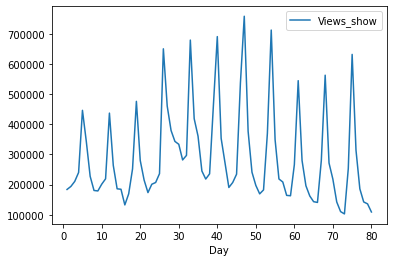

In [113]:
# Plot Views_show (y-axis) over Day (x-axis).
media.plot.line(x='Day', y='Views_show')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


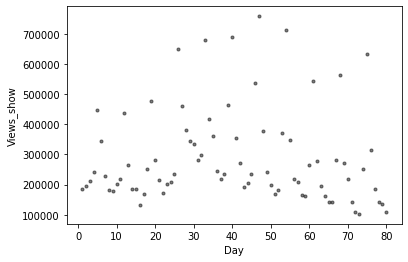

In [114]:
# Scatter Plot Views_show (y-axis) over Day (x-axis).
colors = (0,0,0)
area = np.pi*3
plt.scatter(media.Day, media.Views_show, s=area, c=colors, alpha=0.5)
plt.xlabel('Day')
plt.ylabel('Views_show')
plt.show()

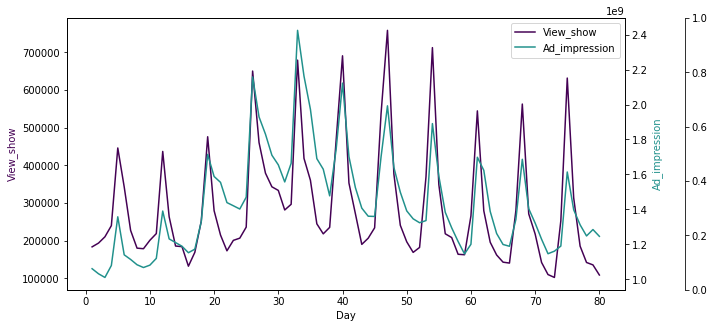

In [115]:
# Plot both for Views_show vs. Day and Ad_impressions vs. Day.
fig = plt.figure(figsize=(10, 5))
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.Day,media.Views_show, color=color1, label="View_show")
p2, = par1.plot(media.Day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

par2.spines['right'].set_position(('outward', 60))

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

In [0]:
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday.
# Add 'Weekday' column.
media['Weekday'] = (media['Day']+3) % 7
media.Weekday.replace(0, 7, inplace=True)
media['Weekday'] = media['Weekday'].astype(int)

In [117]:
media.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,Weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6,2
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7,3
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8,4
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9,5
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10,6


In [0]:
# Split a dataset into X and y.
X = media[['Visitors', 'Weekday']]
y = media['Views_show']

In [119]:
# LinearRegression
lr = LinearRegression()

# Fit the model
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
X = sm.add_constant(X)
lr_1 = sm.OLS(y,X).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           8.01e-12
Time:                        03:28:41   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [0]:
# Create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5:
      return 1
    elif i % 7 == 4:
      return 1
    else:
      return 0

    return i

media['Weekend']=[cond(i) for i in media['Day']]

In [122]:
media.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,Weekday,Weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6,2,0
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7,3,0
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8,4,0
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9,5,0
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10,6,0


In [0]:
# Split a dataset into X and y.
X = media[['Visitors', 'Weekend']]
y = media['Views_show']

In [124]:
X = sm.add_constant(X)
lr_2 = sm.OLS(y,X).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           2.51e-12
Time:                        03:28:41   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [0]:
# Split a dataset into X and y.
X = media[['Visitors', 'Weekend', 'Character_A']]
y = media['Views_show']

In [126]:
X = sm.add_constant(X)
lr_3 = sm.OLS(y,X).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           1.53e-14
Time:                        03:28:41   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [0]:
# Create lag variable.
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media.Lag_Views.replace(108961,0, inplace=True)

In [128]:
media.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,Weekday,Weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6,2,0,446314
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7,3,0,342997
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8,4,0,227313
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9,5,0,180313
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10,6,0,178800


In [0]:
# Split a dataset into X and y.
X = media[['Visitors', 'Character_A', 'Lag_Views', 'Weekend']]
y = media['Views_show']

In [130]:
X = sm.add_constant(X)
lr_4 = sm.OLS(y,X).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           3.16e-21
Time:                        03:28:41   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

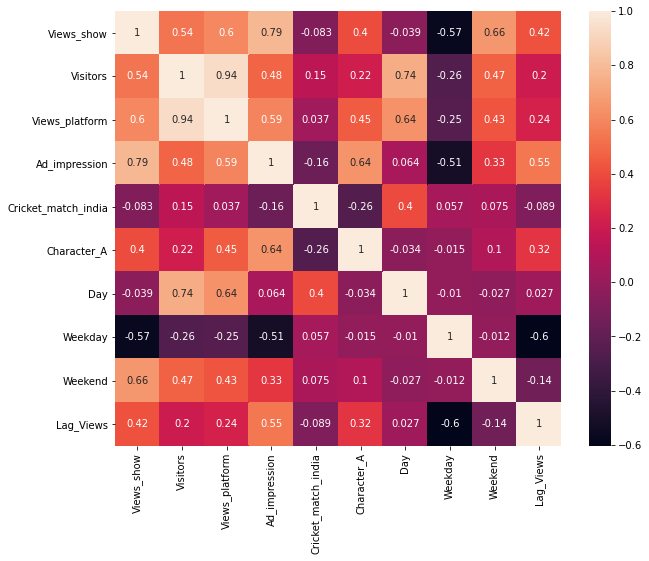

In [131]:
# Plot correlations on a heatmap.
plt.figure(figsize = (10,8))
sns.heatmap(media.corr(), annot=True)

In [0]:
# Split a dataset into X and y.
X = media[['Weekend', 'Character_A', 'Views_platform']]
y = media['Views_show']

In [133]:
X = sm.add_constant(X)
lr_5 = sm.OLS(y,X).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           3.59e-15
Time:                        03:28:42   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

In [0]:
# Split a dataset into X and y.
X = media[['Weekend', 'Character_A', 'Visitors']]
y = media['Views_show']

In [135]:
X = sm.add_constant(X)
lr_6 = sm.OLS(y,X).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           1.53e-14
Time:                        03:28:42   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [0]:
# Split a dataset into X and y.
X = media[['Weekend', 'Character_A', 'Visitors', 'Ad_impression']]
y = media['Views_show']

In [137]:
X = sm.add_constant(X)
lr_7 = sm.OLS(y,X).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           1.10e-25
Time:                        03:28:42   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

In [0]:
# Split a dataset into X and y.
X = media[['Weekend', 'Character_A', 'Ad_impression']]
y = media['Views_show']

In [139]:
X = sm.add_constant(X)
lr_8 = sm.OLS(y,X).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           1.05e-26
Time:                        03:28:42   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [0]:
# Covert Ad_impression unit into million
media['Ad_impression_million'] = media['Ad_impression']/1000000

In [0]:
# Split a dataset into X and y.
X = media[['Weekend', 'Character_A', 'Ad_impression_million', 'Cricket_match_india']]
y = media['Views_show']

In [142]:
X = sm.add_constant(X)
lr_9 = sm.OLS(y,X).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           1.02e-25
Time:                        03:28:58   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

In [0]:
# Split a dataset into X and y.
X = media[['Weekend', 'Character_A', 'Ad_impression_million']]
y = media['Views_show']

In [144]:
X = sm.add_constant(X)
lr_10 = sm.OLS(y,X).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           1.05e-26
Time:                        03:30:47   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

In [0]:
# Make predictions using the model.
X = media[['Weekend', 'Character_A', 'Ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lr_10.predict(X)

In [0]:
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [151]:
print('Mean_Squared_Error:', mse)
print("r^2 on test data: %f" % r_squared)

Mean_Squared_Error: 4677651616.2534075
r^2 on test data: 0.802643


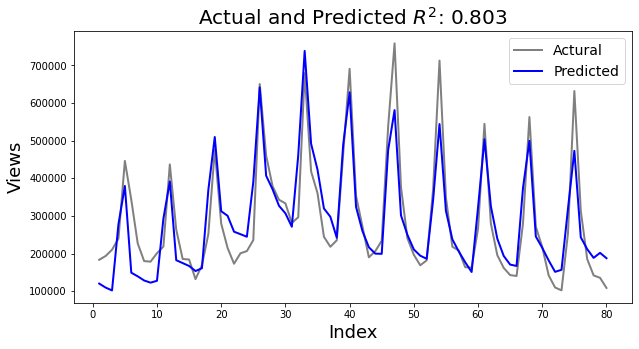

In [159]:
# Plot Actual vs Predicted.
c = [i for i in range(1,81,1)]
fig = plt.figure(figsize=(10, 5))
plt.plot(c, media.Views_show, color="gray", linewidth=2, linestyle="-")
plt.plot(c, Predicted_views, color="blue",  linewidth=2, linestyle="-")
plt.title("Actual and Predicted $R^2$: %.3f" % (r_squared), fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views', fontsize=18)
plt.legend(['Actural', 'Predicted'], loc='upper right', fontsize=14)

Text(0, 0.5, 'Views_show - Predicted_views')

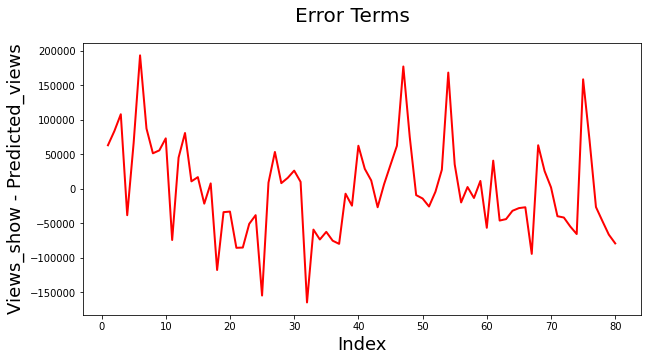

In [158]:
# Plot Error Terms.
c = [i for i in range(1,81,1)]
fig = plt.figure(figsize=(10, 5))
plt.plot(c,media.Views_show-Predicted_views, color="red", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views_show - Predicted_views', fontsize=18)

In [0]:
# Make predictions using the model.
X = media[['Weekend', 'Character_A', 'Visitors']]
X = sm.add_constant(X)
Predicted_views = lr_6.predict(X)

In [0]:
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [162]:
print('Mean_Squared_Error:', mse)
print("r^2 on test data: %f" % r_squared)

Mean_Squared_Error: 9815432480.451523
r^2 on test data: 0.585873


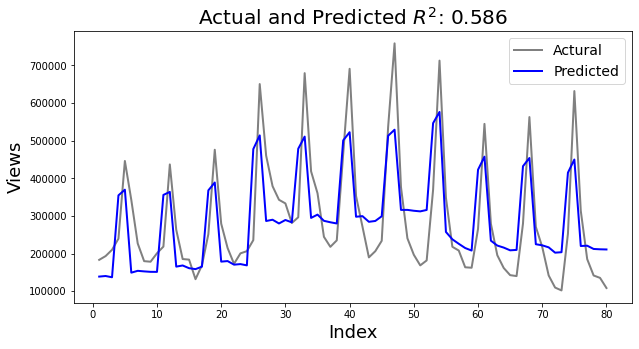

In [163]:
# Plot Actual vs Predicted.
c = [i for i in range(1,81,1)]
fig = plt.figure(figsize=(10, 5))
plt.plot(c, media.Views_show, color="gray", linewidth=2, linestyle="-")
plt.plot(c, Predicted_views, color="blue",  linewidth=2, linestyle="-")
plt.title("Actual and Predicted $R^2$: %.3f" % (r_squared), fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views', fontsize=18)
plt.legend(['Actural', 'Predicted'], loc='upper right', fontsize=14)

Text(0, 0.5, 'Views_show - Predicted_views')

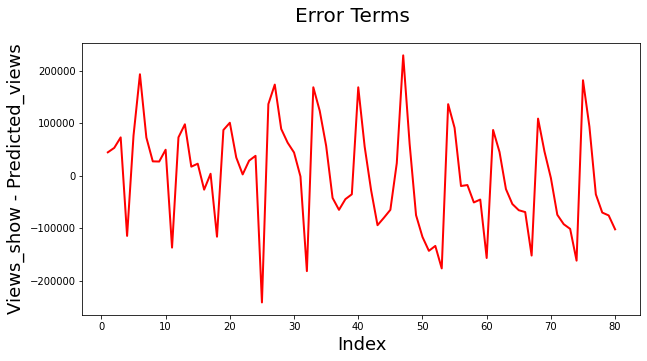

In [164]:
# Plot Error Terms.
c = [i for i in range(1,81,1)]
fig = plt.figure(figsize=(10, 5))
plt.plot(c,media.Views_show-Predicted_views, color="red", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views_show - Predicted_views', fontsize=18)